# The Phase Of A Qubit

A qubit lives in a superposition of two states and its state is represented as: $$|\psi\rangle=cos\frac{\theta}{2}|0\rangle+e^{i\phi}sin\frac{\theta}{2}|1\rangle.$$We've played enough with $\theta$ but not with the phase of the qubit, i.e., $\phi$. Let's start with a simple Quantum Circuit.

In [1]:
# Importing Quantum Circuit class from qiskit.
from qiskit import QuantumCircuit

# Constructing a simple circuit with 1 qubit.
qc = QuantumCircuit(1)

By default, the qubit is initialized with a state $|0\rangle$. Before proceeding, lets define a funcion to run this circuit.

In [2]:
# Importing functions to run the circuit.
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

# Defining a funnction to execute the job on a quantum simulator.
def execute_circuit(circuit, simulator='statevector_simulator', plot=True):

    # We choose the statevector simulator. It returns the probabilities of observing the qubit in all possible states.
    backend = Aer.get_backend(simulator)
    
    # Running the job on the backend.
    job = execute(qc, backend)
    
    # Extracting results of the job
    result = job.result()
    
    # Storing the probabilities of observing in the 'counts' dictionary.
    counts = result.get_counts()
    
    if plot == True:
        return plot_histogram(counts)
    else:
        return counts

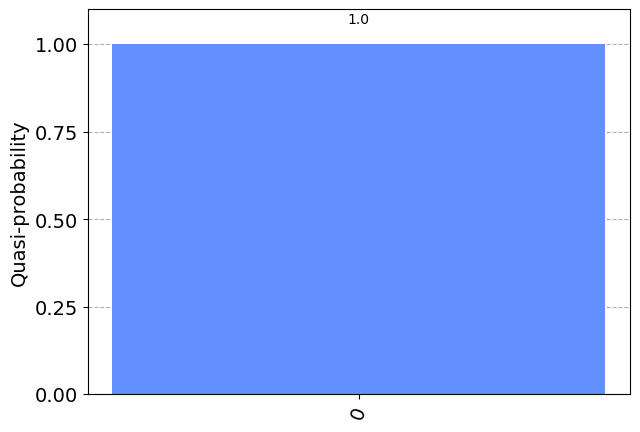

In [3]:
# Executing the circuit.
execute_circuit(qc)

The histogram shows that the circuit if measured, would collapse into the state $|0\rangle$ with absolute certainty. Geometrically, the state $|0\rangle$ is represented as a verticle vector pointing towards the positive Z axis in the Bloch Sphere.

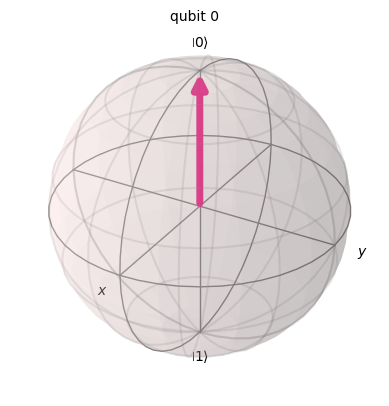

In [4]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc)

We can represent the phase of the qubit plot_state qsphere function.

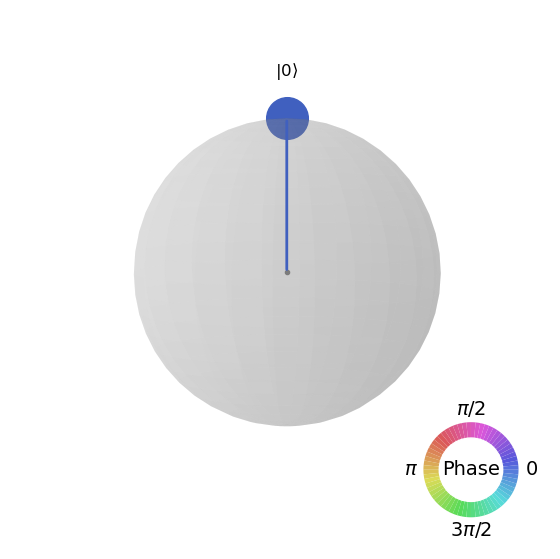

In [5]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(qc)

It shows that the QuantumCircuit is in just one absolute state with 0 phase (although not necessarily 0, the phases are periodic and repeat after an interval of $2\pi$, so by convention we choose the phase 0). Now, lets use the X gate to flip the state of the qubit. An X gate performs the following operation:$$X|0\rangle=|1\rangle$$

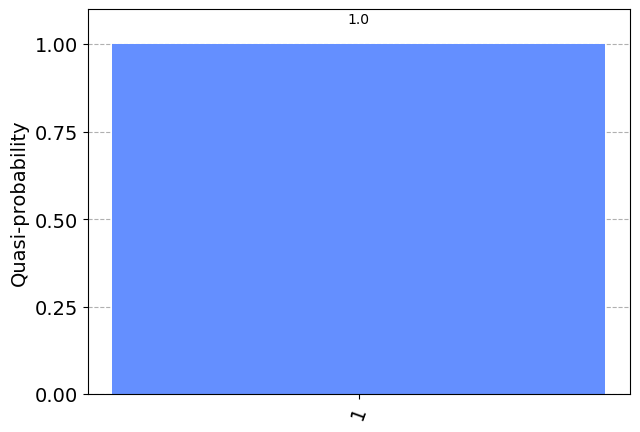

In [6]:
qc = QuantumCircuit(1)
qc.x(0)

execute_circuit(qc)

And as expected, the circuit would yield the state $|1\rangle$ with absolute certainty. Graphically, we can represent it as follows.

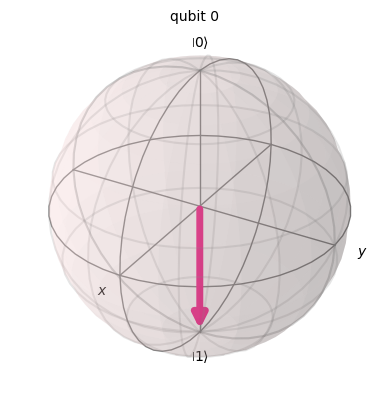

In [7]:
plot_bloch_multivector(qc)

Plotting the phase, again we observe it in a 0 phase.

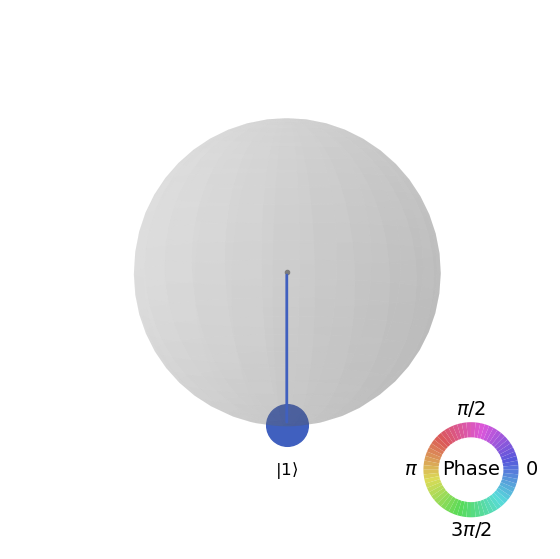

In [8]:
plot_state_qsphere(qc)

Now, we shall put the qubit in a uniform superposition using the Hadamard gate. The Hadamard gate performs the following operating:$$H|0\rangle=\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle$$Upon measurement of the state $H|0\rangle$, we are expected to observe the state $|0\rangle$ with a probability of $\left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}$ and the state $|1\rangle$ with the same probability, $\left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}$. 

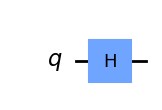

In [9]:
# Constructing a circuit with one qubit.
qc = QuantumCircuit(1)

# Applying Hadamard gate to the qubit.
qc.h(0)

# Drawing the circuit.
qc.draw('mpl')

As the mathematics suggest, we get the following result on executing the circuit.

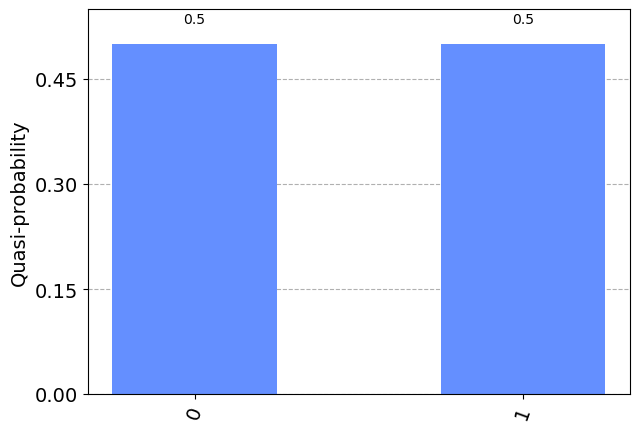

In [10]:
execute_circuit(qc)

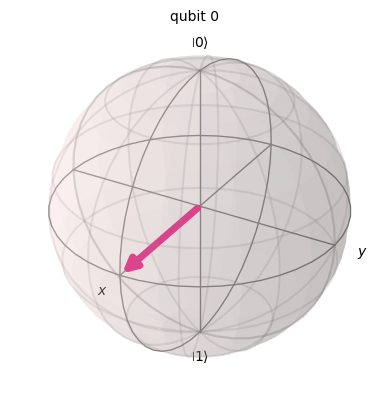

In [11]:
# Plotting it on the Bloch Sphere.
plot_bloch_multivector(qc)

Now the state points towards the poisitve X axis.

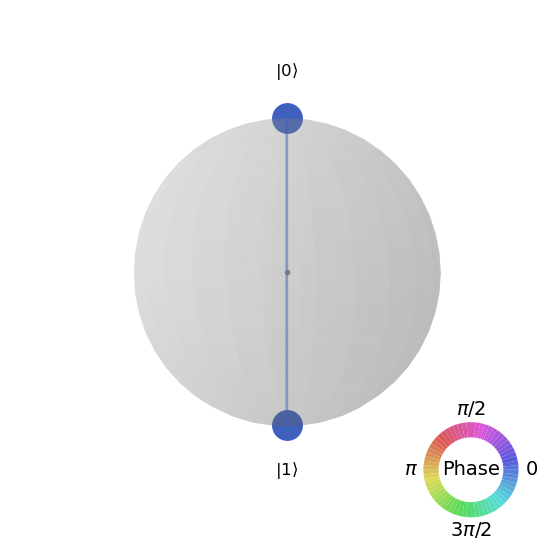

In [12]:
# PLotting the phase.
plot_state_qsphere(qc)

The qubit is in uniform superposition of the basis states and both the states are still in the same phase. But now lets apply the Hadamard gate to the state $|1\rangle$, that would be obtained after flipping the state $|0\rangle$ using the X gate. The operation would be as follows. $$HX|0\rangle=H|1\rangle=\frac{1}{\sqrt{2}}|0\rangle-\frac{1}{\sqrt{2}}|1\rangle$$. The H-Gate operation on the state $|1\rangle$ returns a similar state just with an inverted sign for the state $|1\rangle$. But would it matter?

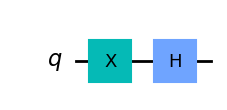

In [13]:
# Constructing the QuantumCircuit with 1 qubit.
qc = QuantumCircuit(1)

# Flipping the state of the qubit from |0> to |1> using the X gate.
qc.x(0)

# Applying Hadamard gate on the state |1>.
qc.h(0)

# Visualizing the circuit.
qc.draw('mpl')

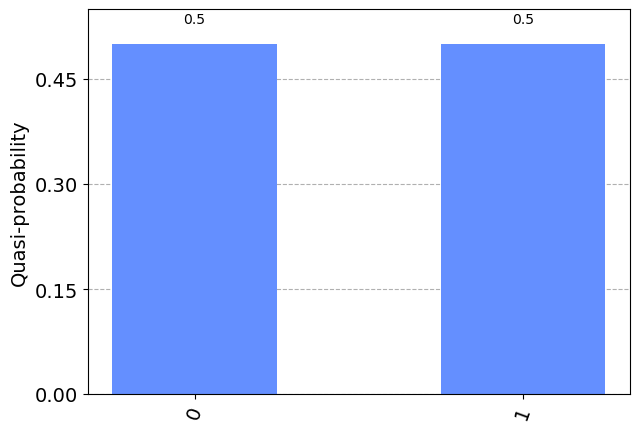

In [14]:
# Executing the circuit.
execute_circuit(qc)

Upon executing, we observe that the probabilities of observing the states is still the same (0.5) and indeed it should be the same. The probabilities of observing a state is the square of the coefficient (actually, the product of the coefficient with its conjugate) of that state. So, a negative sign doesn't really make a difference. Atleast that's what it forces us to think. However, this sign carries a huge significance. Let's plot the state.

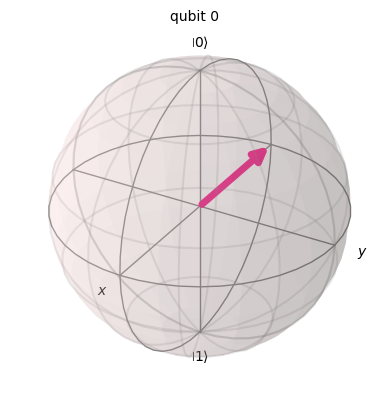

In [15]:
# Plotting the Bloch Sphere.
plot_bloch_multivector(qc)

Now, the state points in the negative X direction. How's that a big deal? Let's observe the phases of the states now.

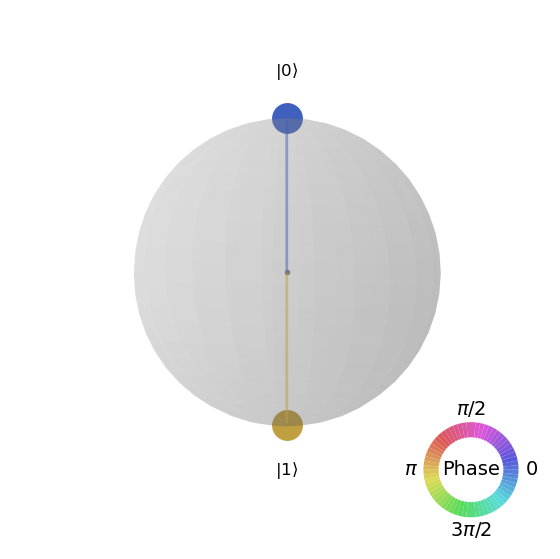

In [16]:
# Plotting the phases.
plot_state_qsphere(qc)

So the negative sign did mean something! Although it doesn't alter the probability of observing the qubit in one of the states, it does alter the phase. The phases of the states $|0\rangle$ and $|1\rangle$ are separated by an angle $\pi$. But how exactly is it of any use? We'll see. Let's explore another way of achieving this configuration.

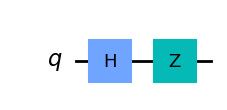

In [17]:
# Constructing a Quantum Circuit with one qubit.
qc = QuantumCircuit(1)

# Putting it in uniform superposition.
qc.h(0)

# Applying the Z (Pauli Z) gate.
qc.z(0)

# Visualizing the circuit.
qc.draw('mpl')

The Pauli Z Gate (represented as the Pauli Z matrix) inverts the phase of the state $|1\rangle$ and leaves the state $|0\rangle$ as it is. Lets look at the mathematics.$$ZH|0\rangle=Z\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right)=\frac{1}{\sqrt{2}}Z|0\rangle-\frac{1}{\sqrt{2}}Z|1\rangle=\frac{1}{\sqrt{2}}|0\rangle-\frac{1}{\sqrt{2}}|1\rangle=H|1\rangle$$. Hence a $ZH|0\rangle$ operation is equivalent to a $H|1\rangle$ operation. So quite naturally, we get the following graphical representation.

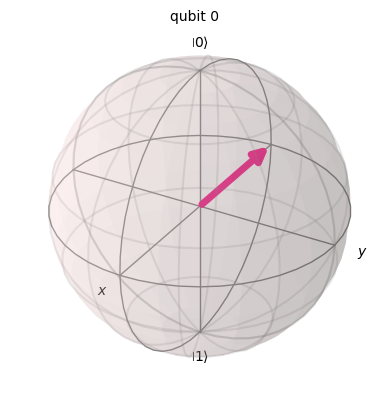

In [18]:
# Plotting the Bloch Sphere. 
plot_bloch_multivector(qc)

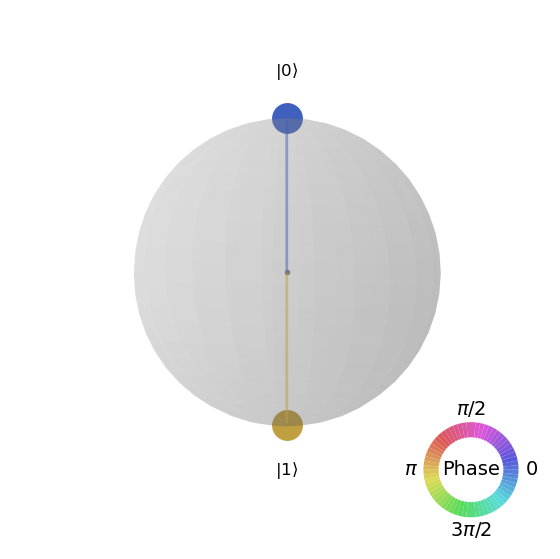

In [19]:
# Plotting the phases.
plot_state_qsphere(qc)

Now, what do we do with it? We can utilize this property to mark a state and enhance the probability of observinf that state. Let's look at a two qubit example.

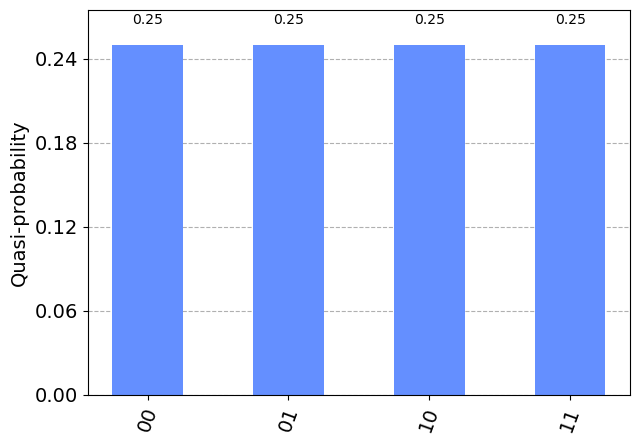

In [20]:
# Constructing a Quantum Circuit with two qubits.
qc = QuantumCircuit(2)



# Putting them in a uniform superposition.
qc.h(0)
qc.h(1)

# Executing the circuit.
execute_circuit(qc)

So what happened here? Lets look at the mathematics. It is to be noted that the operations performed on the qubits are tensor/kronecker operations. The Quantum Circuit was prepared with both qubits initialized with a state $|0\rangle$. The combined state of the system now is $|0\rangle\otimes|0\rangle$ or simply $|00\rangle$. Then, the Hadamard gate is applied to both the qubits. It is operated as follows: 

$$H\otimes H\left(|0\rangle\otimes|0\rangle\right)$$. 

The H gate on the left operates on the qubit on the left and the H gate on the right operates on the qubit on the right. 

$$H\otimes H\left(|0\rangle\otimes|0\rangle\right)=H|0\rangle\otimes H|0\rangle=\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right)\otimes \left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right)=\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle$$ 

So the final state of the qubit is $\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle$ and the probability of observing each state upon measuring the system is the same and equal to the square of the coefficients, i.e., $\left(\frac{1}{2}\right)^2$ that is, $0.25$. That is exactly what the above histogram represents. 

NOTE: The order of qubits in the above histogram is to be read from right to left. The qubit on the right represents the 0th qubit and the qubit on the left represents the 1st qubit.

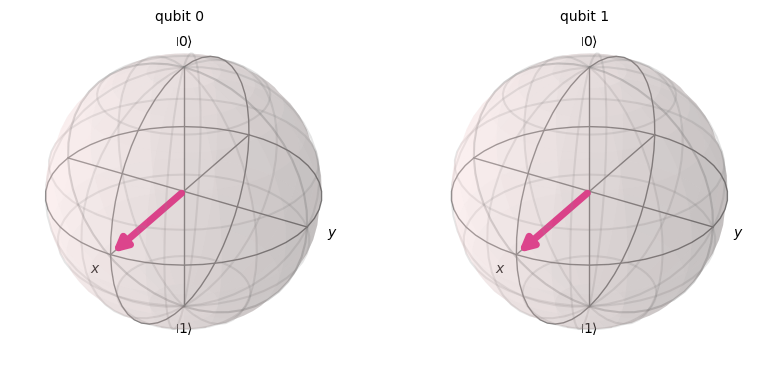

In [21]:
# Plotting the Bloch Spheres for both the qubits.
plot_bloch_multivector(qc)

Both the qubits are in the same state as both were acted upon by the Hadamard gate. Now, the phases of the states are all the same because all of them have a '+' sign before them in the equation of the state of the qubit.

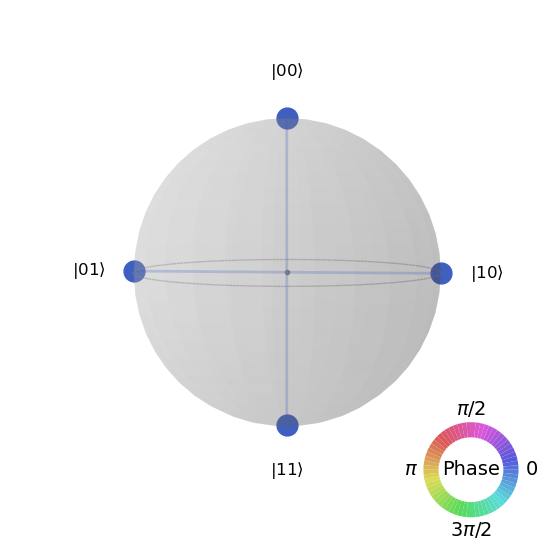

In [22]:
plot_state_qsphere(qc)

Now, let's mark a particular state by inverting its phase using the controlled Z operation or the CZ gate. A CZ gate inverts the amplitude of the state with all 1's without altering the probabilities.

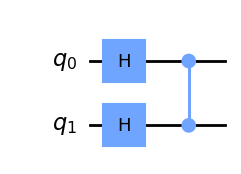

In [23]:
# Constructing a Quantum Circuit with two qubits.
qc = QuantumCircuit(2)

# Putting them in a uniform superposition.
qc.h(0)
qc.h(1)

# Applying a controlled Z gate with qubit 0 as the control qubit and qubit 1 as the target qubit.
qc.cz(0,1)

# Visualizing the circuit.
qc.draw('mpl')

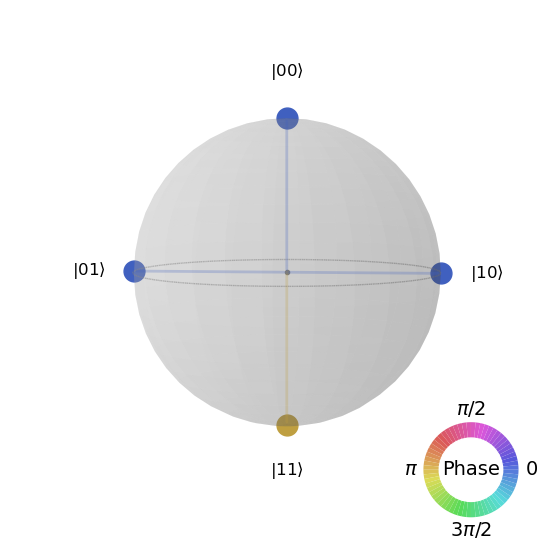

In [24]:
# Plotting the phases.
plot_state_qsphere(qc)

Now we see that the state $|11\rangle$ has an additional phase $\pi$. Lets look at it mathematically. Note that the CZ gate inverts the amplitude of the state with all 1's in it. Applying it on the uniform superposition gives:

$$\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle \xrightarrow[\text{}]{\text{CZ}} \frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle-\frac{1}{2}|11\rangle$$ 

It explains the above state sphere. The state on the left is the state of uniform superposition. It can be written as a tensor product of two independent qubit states. The state on the right is an entangled state and there's no way to represent it as a tensor product of two individual qubit states. Thus, the CZ gate gate not only changes the sign of a component, but it also entangles the qubit, thus developing the correlations. 

Now, lets look at a three qubit example. Theres no MCZ(Multi Control Z) Gate in qiskit, so we append to the circuit the ZGate from the circuit library and specify the qubit to be controlled.

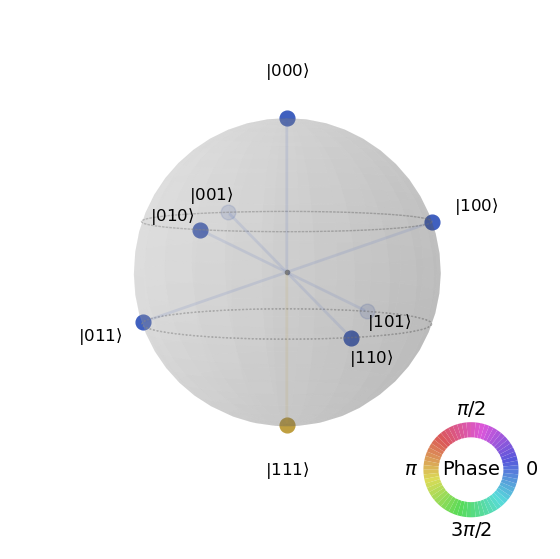

In [25]:
# Importing the ZGate
from qiskit.circuit.library import ZGate

# Constructing a three qubit Quantum Circuit. 
qc = QuantumCircuit(3)

# Applying the H gate on all the qubits.
qc.h([0,1,2])

# Appending the controlled Z gate to the qubits [0,1,2] in the circuit to control the qubit 2, i.e., qubit 2 is the target qubit. 
qc.append(ZGate().control(2), [0,1,2])

# Plotting the phase
plot_state_qsphere(qc)

As expected, the state with all 1's gets its amplitude inverted.

# The Grover's Algorithm

In 1996, Luv Grover deviced an algorithm to provide a quadratic speedup in unstructured database search. The algorithm works as follows.

A Unitary operation, called an Oracle, is used to invert the amplitude of the state which has to be identified from a random set of states/data in an unstructured database. It is such that, 

$$
U_{w}|x\rangle= \left\{
\begin{array}{ll} 
      |x\rangle,   x\neq w \\
      -|x\rangle,   x=w\\
\end{array} 
\right.$$

where $|w\rangle$ is the desired state. This oracle is applied on a uniform superposition of initial states, followed by the Grover's Diffusion operator, $U_{s}$, given as,

$$U_s=2|s\rangle\langle s|-I$$

where $I$ is the unitary operator, and $|s\rangle$ is the uniform superposition of initial states, gievn as,

$$|s\rangle=\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle.$$

Here, N is the number of data instances in the dataset. We need atleast $n=[log_2N]+1$ qubits to represent the data. The operation of the compound operator $U_sU_w$ on the initial state $|s\rangle$ rotates it towards the desired state $|w\rangle$ (the state that we're searching for). Applying the operator $\frac{\pi\sqrt{N}}{4}$ number of times, the state $|s\rangle$ is rotated enough to almost overlap (if not completely overlap) the desired state $|w\rangle$. The circuit then looks as follows.


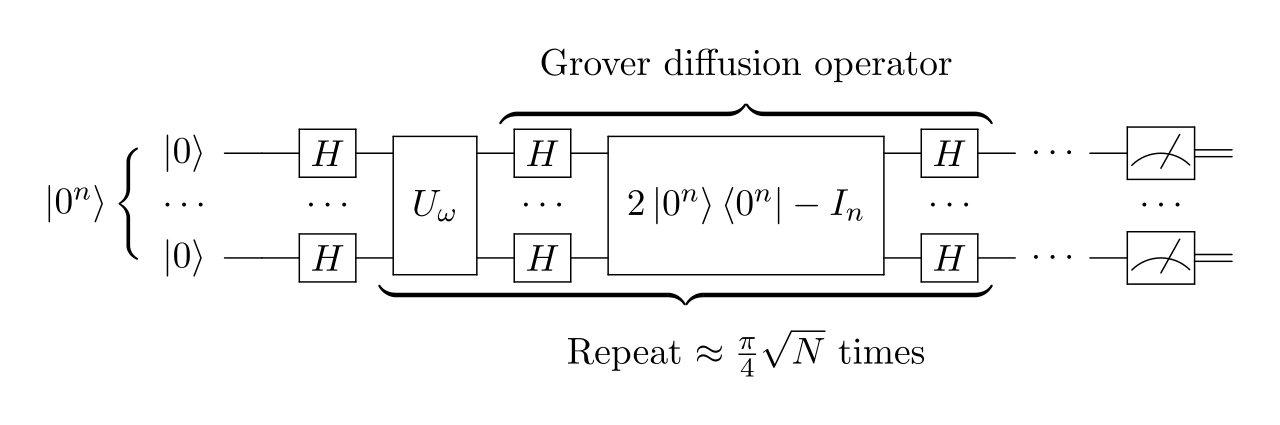


Till now, we have figured out how to mark a state by inverting its amplitude. Lets use this knowledge to locate the state $|00\rangle$ from a set of possible states that two qubits can represent, i.e., ${|00\rangle,|01\rangle,|10\rangle,|11\rangle}$. The first step, is to invert the amplitude of the state $|00\rangle$. We shall proceed like we did to invert the amplitude of the state $|11\rangle$.

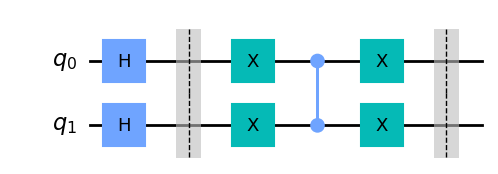

In [26]:
# Constructing a two qubit Quantum Circuit.
qc = QuantumCircuit(2)

# Putting them in a uniform superposition.
qc.h(0)
qc.h(1)

# Applying a barrier (just a visualization tool, doesn't alter the state).
qc.barrier()

# Marking the state whose probabiility has to be amplified.
qc.x(0)
qc.x(1)

# Controlled Z operation.
qc.cz(0,1)

# Undoing the X-Gate operation
qc.x(0)
qc.x(1)

# Applying a barrier.
qc.barrier()

# Visualizing the circuit.
qc.draw('mpl')
#plot_state_qsphere(qc)

Now, it'd be natural to wonder what was the purpose of applying the X gates. While marking the $|11\rangle$ state, no X gates were used. But this time, we need to mark $|00\rangle$ state. The CZ gate inverts the amplitude of the state with only 1s in it. So, we need to invert the $|00\rangle$ state to $|11\rangle$ state first, apply CZ gate such that it inverts to $-|11\rangle$, then again apply X gates to flip it to $-|00\rangle$. Lets look at the complete mathematics. Firsts step is the $H\otimes H$ operation as before.

$$H\otimes H\left(|0\rangle\otimes|0\rangle\right)=H|0\rangle\otimes H|0\rangle=\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right)\otimes \left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right)=\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle$$ 

Now, we have the $X\otimes X$ operation.

$$\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle \xrightarrow[\text{}]{{X\otimes X}} \frac{1}{2}|11\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|00\rangle$$.

Then comes the CZ operation.

$$\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle \xrightarrow[\text{}]{\text{CZ}} -\frac{1}{2}|11\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|00\rangle$$.

And again, the $X\otimes X$ operation.

$$\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle \xrightarrow[\text{}]{{X\otimes X}} -\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle$$.

Now lets plot the phases.

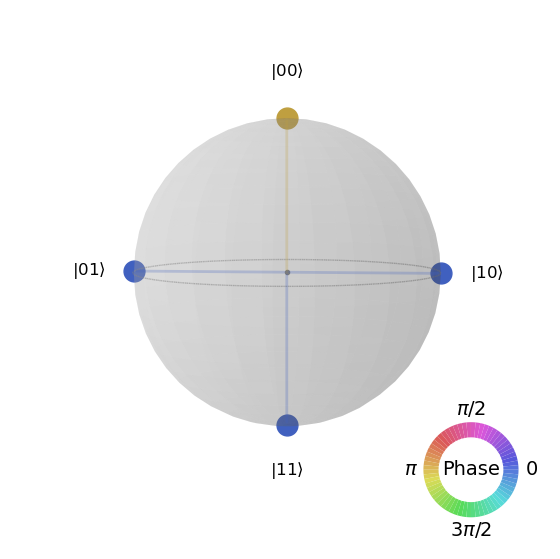

In [27]:
plot_state_qsphere(qc)

We've marked the state. In this scenario, we have an unstructured database with 4 entries ${|00\rangle,|01\rangle,|10\rangle,|11\rangle}$ and we are trying to locate $|00\rangle$. But just inverting the amplitude doesn't cut it. The probability of observing the state is still 0.25.

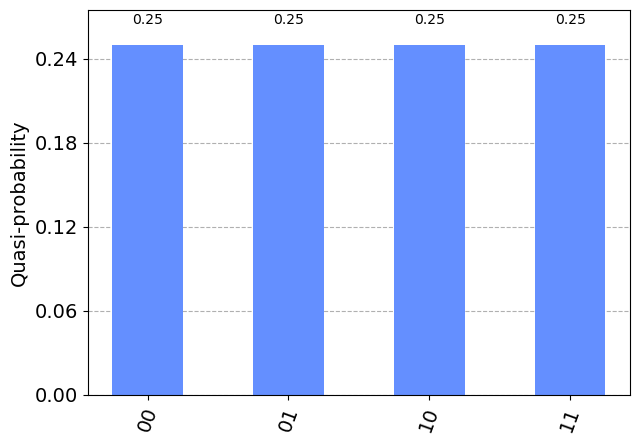

In [28]:
execute_circuit(qc)

We have to enhance it. In Grover's theory, the diffusion operator does it. We need to unentangle the entangled states. Lets construct the diffusion operator and append it to the quantum circuit. 

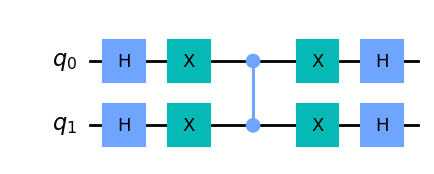

In [29]:
# Constructing the Diffusion Operator
diffusion_operator = QuantumCircuit(2)

diffusion_operator.h([0,1])
diffusion_operator.x([0,1])
diffusion_operator.cz(0,1)
diffusion_operator.x([0,1])
diffusion_operator.h([0,1])

diffusion_operator.name = 'DO'

diffusion_operator.draw('mpl')

That's the circuit for diffusion operator and why should it work? Lets see the mathematcis. After amplitude inversion the state is:

$$-\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle$$. 

Now the first operation in the Diffusion operator is the $H\otimes H$ operation.

$$-\frac{1}{2}|00\rangle+\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle+\frac{1}{2}|11\rangle \xrightarrow{H\otimes H}-\frac{1}{2} \left( H|0\rangle\otimes H|0\rangle\right)+\frac{1}{2}\left(H|0\rangle\otimes H|1\rangle\right)+\frac{1}{2}\left(H|1\rangle\otimes H|0\rangle\right)+\frac{1}{2}\left(H|1\rangle\otimes H|1\rangle\right)$$

Applying Hadamard gates on all the qubits yields,

$$\xrightarrow{} -\frac{1}{2} \left(\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\right)  +  \frac{1}{2} \left(\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\right)  +  \frac{1}{2} \left(\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\right)  +  \frac{1}{2} \left(\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\right)$$

$$\xrightarrow{} -\frac{1}{4}\left(|00\rangle+|01\rangle+|10\rangle+|11\rangle\right)  +  \frac{1}{4}\left(|00\rangle-|01\rangle+|10\rangle-|11\rangle\right)  +  \frac{1}{4}\left(|00\rangle+|01\rangle-|10\rangle-|11\rangle\right)  +  \frac{1}{4}\left(|00\rangle-|01\rangle-|10\rangle+|11\rangle\right)$$

A straight foward cancellation leaves the following 8 terms.

$$\xrightarrow{} \frac{1}{4}\left(|00\rangle-|01\rangle-|11\rangle  -|10\rangle-|11\rangle + |00\rangle-|01\rangle-|10\rangle\right) \xrightarrow{} \frac{1}{4}\times2\left(|00\rangle-|01\rangle-|10\rangle-|11\rangle \right) \xrightarrow{} \frac{1}{2}\left(|00\rangle-|01\rangle-|10\rangle-|11\rangle \right)$$

Now, we have the simple $X\otimes X$ operation.

$$\frac{1}{2}\left(|00\rangle-|01\rangle-|10\rangle-|11\rangle \right) \xrightarrow{X\otimes X} \frac{1}{2}\left(|11\rangle-|10\rangle-|01\rangle-|00\rangle \right)$$

Then, the CZ operation which would invert the amplitude of the state with all 1s in it.

$$\frac{1}{2}\left(|11\rangle-|10\rangle-|01\rangle-|00\rangle \right) \xrightarrow{\text{CZ}} \frac{1}{2}\left(-|11\rangle-|10\rangle-|01\rangle-|00\rangle \right)$$

Now again, the $X\otimes X$ operation.

$$\frac{1}{2}\left(-|11\rangle-|10\rangle-|01\rangle-|00\rangle \right) \xrightarrow{X\otimes X} -\frac{1}{2}\left(|00\rangle+|01\rangle+|10\rangle+|11\rangle \right)$$

Finally, the $H\otimes H$ operation.

$$-\frac{1}{2}\left(|00\rangle+|01\rangle+|10\rangle+|11\rangle\right) \xrightarrow{H\otimes H}-\frac{1}{2} \left( H|0\rangle\otimes H|0\rangle + H|0\rangle\otimes H|1\rangle + H|1\rangle\otimes H|0\rangle + H|1\rangle\otimes H|1\rangle\right)$$ 

Again, applying Hadamard gates on all the qubits yields,

$$\xrightarrow{H\otimes H}-\frac{1}{2} \left( \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)   +  \frac{1}{\sqrt{2}} \left(|0\rangle+|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)    +  \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)     +  \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)\right)$$

$$\xrightarrow{} -\frac{1}{4} \left(|00\rangle+|01\rangle+|10\rangle+|11\rangle   +  |00\rangle-|01\rangle+|10\rangle-|11\rangle    +  |00\rangle+|01\rangle-|10\rangle-|11\rangle  +  |00\rangle-|01\rangle-|10\rangle+|11\rangle\right)$$

Everything cancels out in pairs, leaving 4 times the state $|00\rangle$. Finally we get,

$$-\frac{1}{4}\times4|00\rangle \xrightarrow{} -|00\rangle$$

So, it must work! Lets append it to our circuit and see.

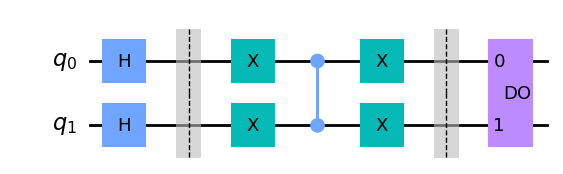

In [30]:
# Appending the diffusion operator to the Quantum Circuit which inverts the state of the |00> state.
qc.append(diffusion_operator, [0,1])

qc.draw('mpl')

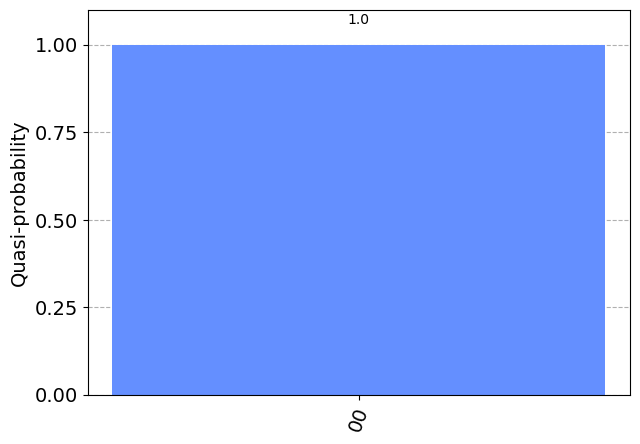

In [31]:
# Executing the circuit.
execute_circuit(qc)

As promised by Grover's Algorithm, the probability of measuring the circuit in $|00\rangle$ state has been enhanced to 1 while the probability of measuring it in any other state is reduced to 0. Lets look at the phase diagram as well.

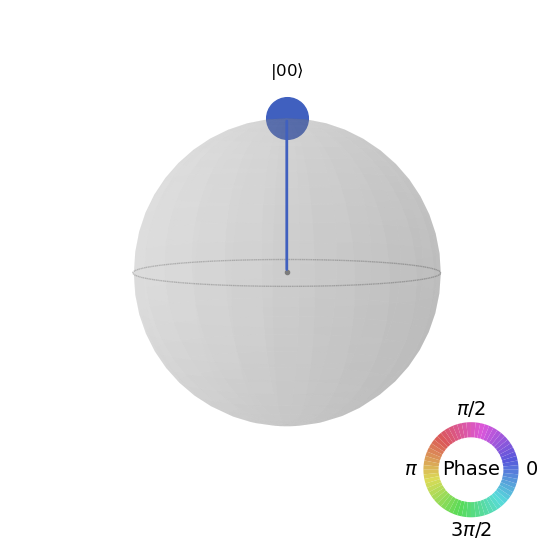

In [32]:
plot_state_qsphere(qc)

Here we go! Just one state. $|00\rangle$. 

# Search For Relatives

Now, we'll attempt to use the knowledge about the Oracle and the Diffusion Operator to search for relaives of a passenger onboard the Titanic.

In [33]:
# Importing the dataset

import pandas as pd
titanic_data = pd.read_csv("C:/Users/DELL/Downloads/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data consists of PassengerId, whether or not the passenger survived the wreck, class of the passenger, Name, Sex and Age of the passenger. SibSp indicates the number or siblings or spouse the passenger had on board with him/her. Parch indicates the number or Parents or Children. Then we have the Ticket number, Ticket Fare, Cabin and the Port at which they Embarked. We shall consider the case of Miss Rice with ID 886.

In [34]:
MrsRice = titanic_data[titanic_data["PassengerId"].eq(886)]
print(MrsRice)

     PassengerId  Survived  Pclass                                  Name  \
885          886         0       3  Rice, Mrs. William (Margaret Norton)   

        Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
885  female  39.0      0      5  382652  29.125   NaN        Q  


The data shows that she had 5 children onboard. Our task would be to look for the children of the women who failed to survive the Titanic wreck. Lets consider the subset of the data which shows passengers with the surname 'Rice'.

In [35]:
subset = list(titanic_data[titanic_data["Name"].str.contains('Rice') & titanic_data["PassengerId"].ne(886)]["PassengerId"])

In [36]:
titanic_data[titanic_data["PassengerId"].isin(subset)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q


We have the data of 4 of her children. All of them boys under 10. All of them failed to survive. Now say we have a set of 16 passengers, which can be encoded using 4 qubits and we want to look for her children. What would be the conditions that must be satisfied by a passenger to be her child. First, they must have the same surname. Second, they must have the same ticket number. Lets select 12 more random passengers from the data and create a new dataframe.

In [37]:
# Number of qubits to be used.
num_qubits = 4

# Specifying the Surname.
Surname = MrsRice.Name.to_string(index=False).split(',')[0]

# Specifying the Ticket.
Ticket = MrsRice.Ticket.to_string(index=False)

In [38]:
import random

ID = []

# Selecting random passengers other than the Rice boys
for i in range(12):
    randomID = random.randrange(0,len(titanic_data))
    if randomID not in subset:
        ID.append(randomID)

# Creating a list of 16 passengers
passengers_list = ID + subset

In [39]:
passengers_list

[574, 606, 573, 849, 314, 233, 662, 186, 310, 106, 229, 346, 17, 172, 279, 788]

In [40]:
# Creating a new dataframe
df = titanic_data[titanic_data["PassengerId"].isin(passengers_list)]

In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S


We have these 16 passengers and now our task is to create a Quantum Circuit representing this data such that when it is measured, it only collapses to the states (or collapses to these states with maximum probability) which represent the Rice Boys. Lets begin with encoding these passengers.

In [42]:
# Function for encoding the passengers.
def encode_passengers(index):
    binary="{:0{}b}".format(index, num_qubits)
    return binary

# Printing the encoded passengers.
for index in range(0, 16):        
    encoded_passenger = df.iloc[[index]]
    print(index, encode_passengers(index), encoded_passenger.Name.to_string(index=False))

0 0000 Rice, Master. Eugene
1 0001 Mionoff, Mr. Stoytcho
2 0010 Rice, Master. Arthur
3 0011 Rood, Mr. Hugh Roscoe
4 0100 Fahlstrom, Mr. Arne Jonas
5 0101 Sjostedt, Mr. Ernst Adolf
6 0110 Rice, Master. Eric
7 0111 Francatelli, Miss. Laura Mabel
8 1000 Hendekovic, Mr. Ignjac
9 1001 Brown, Miss. Amelia "Mildred"
10 1010 Flynn, Mr. John Irwin ("Irving")
11 1011 Kelly, Miss. Mary
12 1100 Lindell, Mr. Edvard Bengtsson
13 1101 Badt, Mr. Mohamed
14 1110 Rice, Master. George Hugh
15 1111 Harper, Rev. John


Now we'll create two Quantum Registers. One to store the passenger infomation and the other to check whether or not a passenger satisfies the conditions.

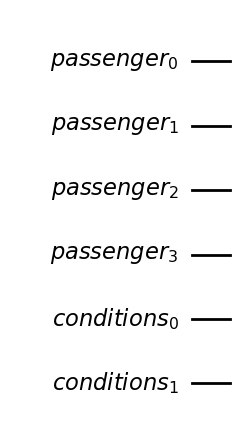

In [43]:
# Importing Quantum Register from Qiskit.
from qiskit import QuantumRegister

# Specifying the number of conditions.
num_conditions = 2

# Defining the Registers.
passenger_register = QuantumRegister(num_qubits, name='passenger')
conditions_register = QuantumRegister(num_conditions, name='conditions')

# Making the Quantum Circuit.
qc = QuantumCircuit(passenger_register, conditions_register)

qc.draw('mpl')

Now, we have an empty quantum circuit. The first requirement would be to create a uniform superposition of the passenger qubits. So we shall apply Hadamard gate on each of them.

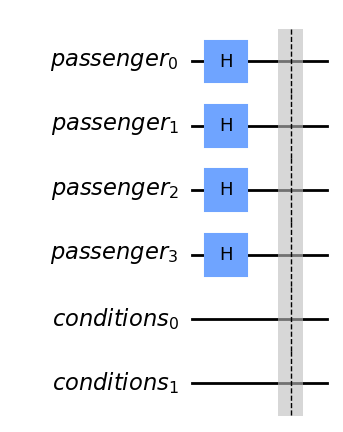

In [44]:
# Applying Hadamard gate on the Passengers Quantum Register.
qc.h(passenger_register)

# Applying a barrier.
qc.barrier()

# Drawing the circuit
qc.draw('mpl')

Next task would be to invert the sign of the states which satisfy the requirements of being Mrs Rice's children. That would be done using an oracle. The conditions register is initialized in the state $|0\rangle$. We want them to be flipped to the state $|1\rangle$ iff the passenger under consideration satisfies the requirements.

In [45]:
# Definining a conditions function.
def conditions(encoded_passenger, QuantumCircuit, PassengerRegister, ConditionsRegister):
    
    # Flip 0th qubit in Conditions Register to 1 if the surname of the encoded passenger matches the surname of Mrs Rice.
    if encoded_passenger.Name.to_string(index=False).split(',')[0] == Surname:
        QuantumCircuit.mcx(PassengerRegister, ConditionsRegister[0])

    # Flip 1st qubit in Conditions Register to 1 if the ticket of the encoded passenger matches the ticket of Mrs Rice.
    if encoded_passenger.Ticket.to_string(index=False) == Ticket:
        QuantumCircuit.mcx(PassengerRegister, ConditionsRegister[1])        
    
    # Invert the amplititude if conditions are satisfied
    QuantumCircuit.append(ZGate().control(num_qubits+num_conditions-1), [i for i in range(num_qubits+num_conditions)])

    # Undo the flip for next passenger's consideration
    if encoded_passenger.Ticket.to_string(index=False) == Ticket:
        QuantumCircuit.mcx(PassengerRegister, ConditionsRegister[1])            
        
    if encoded_passenger.Name.to_string(index=False).split(',')[0] == Surname:
        QuantumCircuit.mcx(PassengerRegister, ConditionsRegister[0])

Earlier, for inverting the amplitude of the state $|00\rangle$ we had to apply X gates to both the qubits to selet that particular state. If we wanted to select $|01\rangle$ state, we'd just apply the X gate to the 0th qubit which is in state $|0\rangle$. Lets define a function to select the states.

In [46]:
def select_state(position, QuantumCircuit, qubits):
    
    for i in range(0, num_qubits):
        # Applying X gate if the qubit is in state 0.
        if position[::-1][i]=="0":
            QuantumCircuit.x(qubits[i])

Now, we can define the oracle circuit to flip the desired states.

In [47]:
def oracle_circuit(DataFrame, PassengerRegister, ConditionsRegister):
    
    # Constructing the Oracle Circuit.
    oracle_circuit = QuantumCircuit(PassengerRegister, ConditionsRegister)
    
    
    for index in range(0, len(DataFrame)):            
        
        # Converting the index of Passenger in the DataFrame to a binary state.
        binary_postion = encode_passengers(index)
        
        # Selectig the qubits by flipping 0s to 1s.
        select_state(binary_postion, oracle_circuit, PassengerRegister)
        
        # Verifying whether or not the conditions are satisfied.
        conditions(DataFrame.iloc[[index]], oracle_circuit, PassengerRegister, ConditionsRegister)
        
        # Unselecting the qubits by applying the gates again to consider the next passenger in the DataFrame.
        select_state(binary_postion, oracle_circuit, PassengerRegister)
        
        # Naming the circuit.
        oracle_circuit.name = 'Oracle'
        
        # Applying a barrier.
        oracle_circuit.barrier()
        
    # Returning the circuit.
    return oracle_circuit

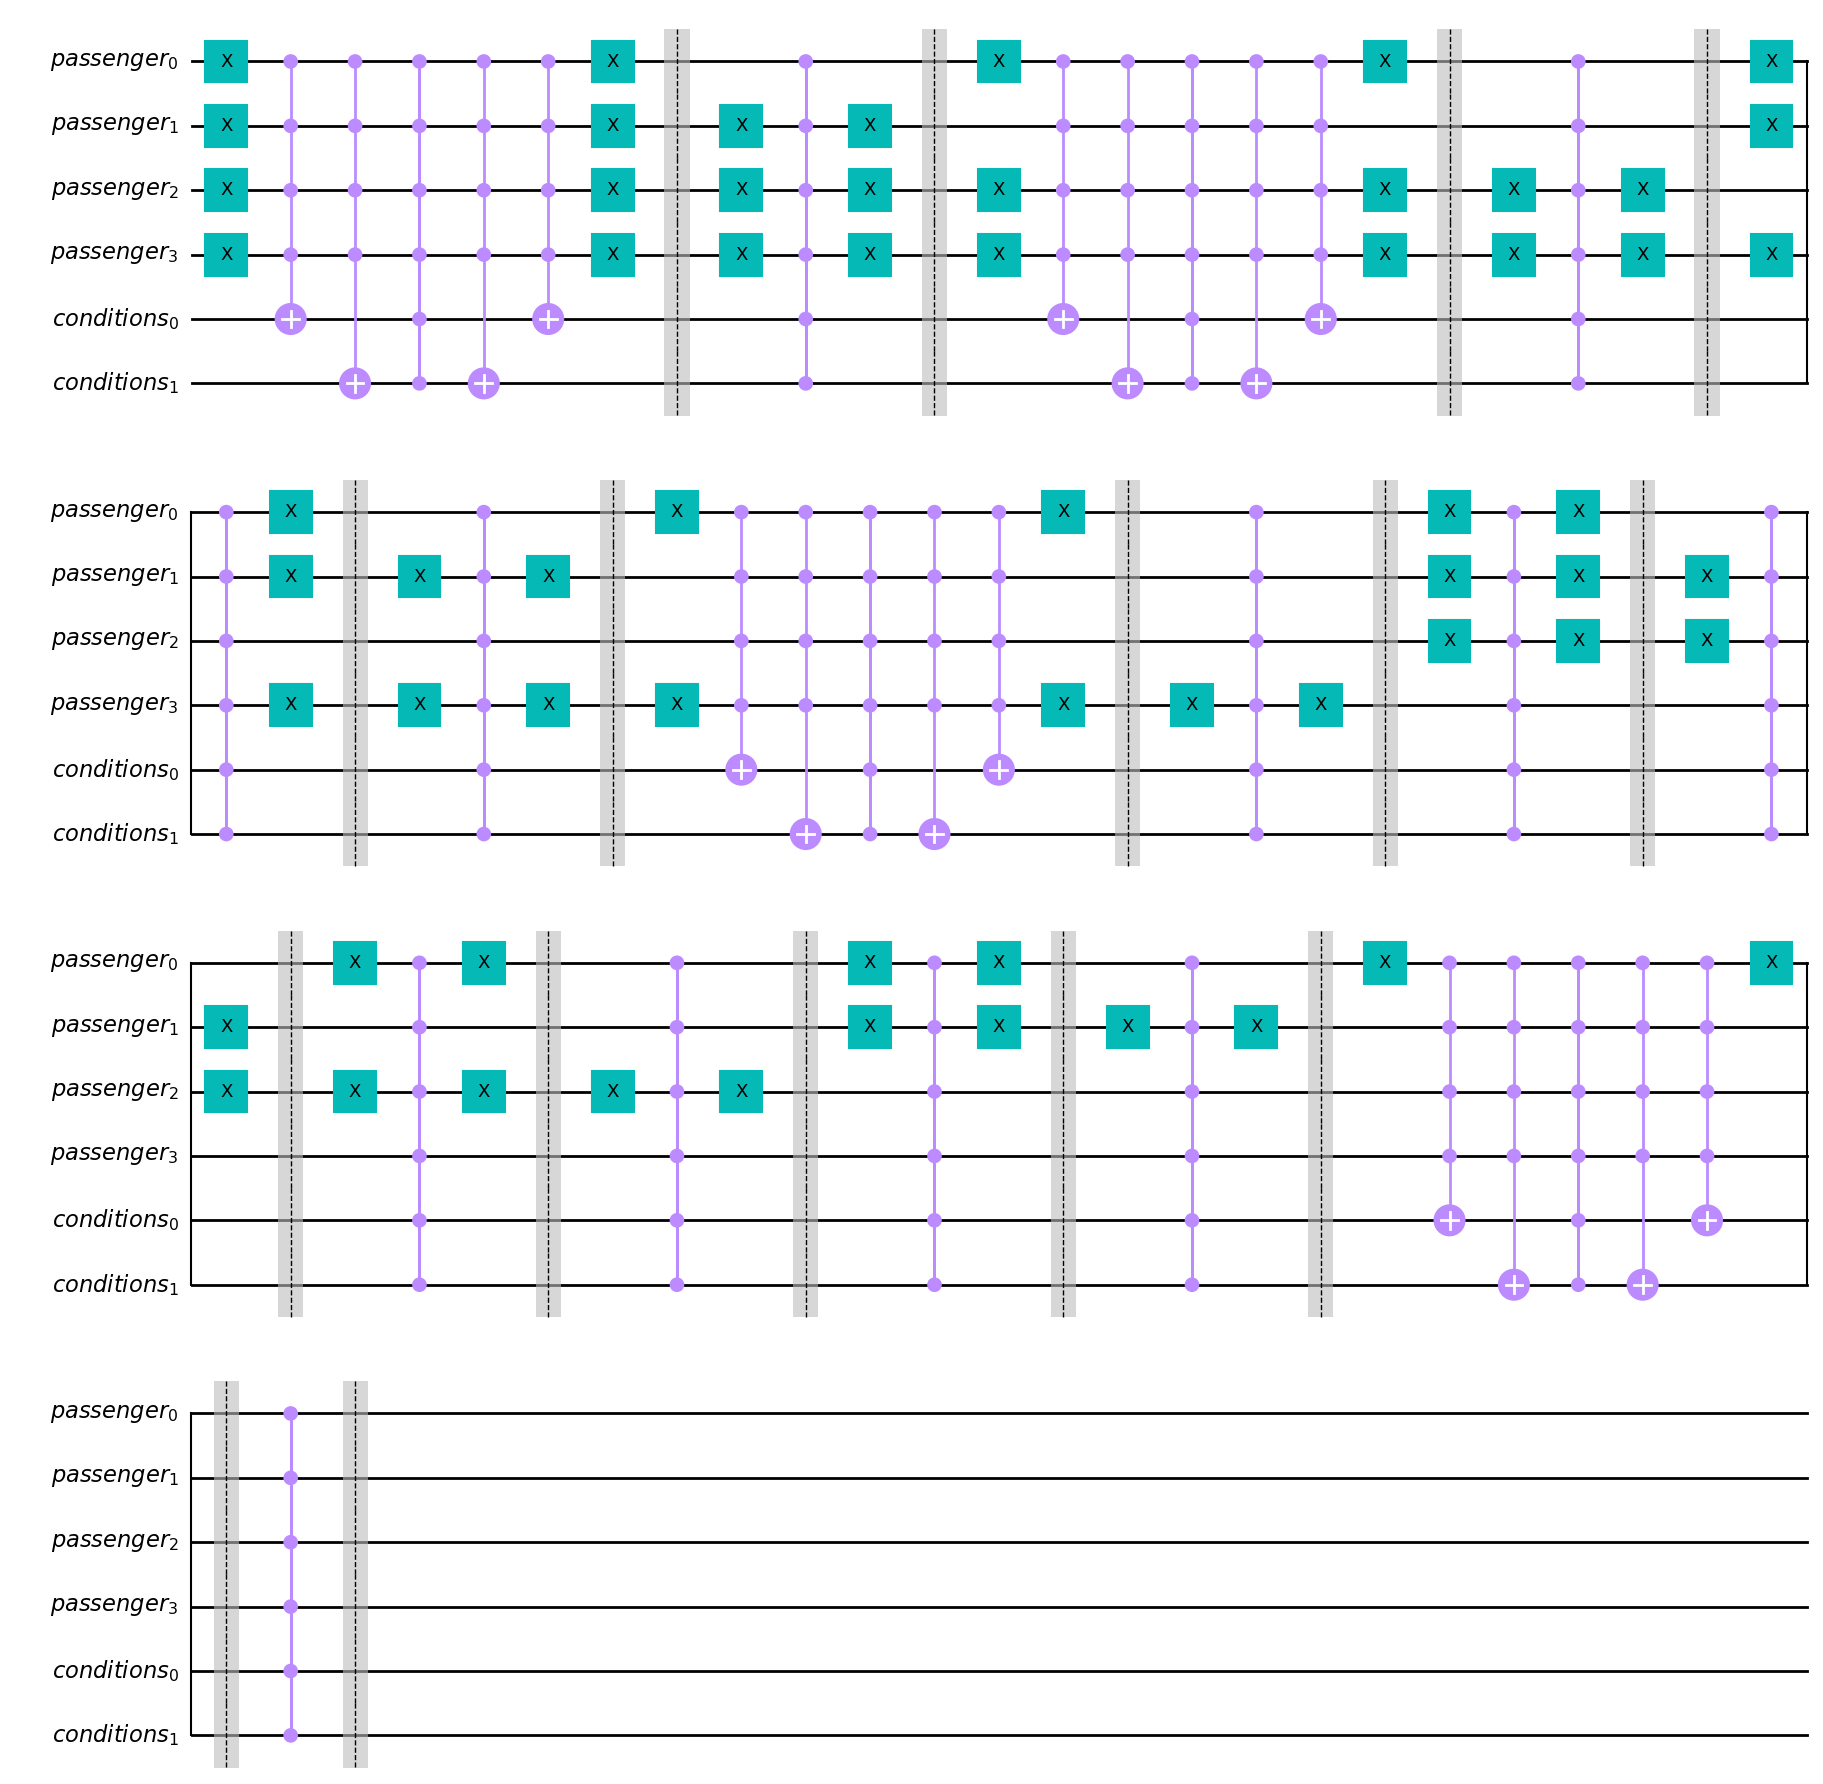

In [48]:
# Visualizing the Oracle.
oracle = oracle_circuit(df, passenger_register, conditions_register)
oracle.draw('mpl')

The oracle shows that only 4 passengers satisfied the conditions (as the MCX gates flipped the conditions qubits only for 4 passengers). Now lets append this oracle to our Quantum Circuit.

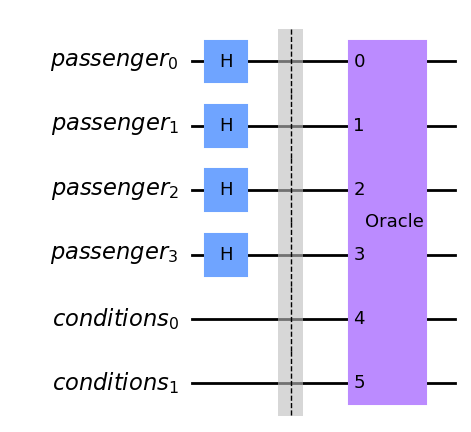

In [49]:
qc.append(oracle, [i for i in range(num_qubits+num_conditions)])

# visualizing the circuit
qc.draw('mpl')

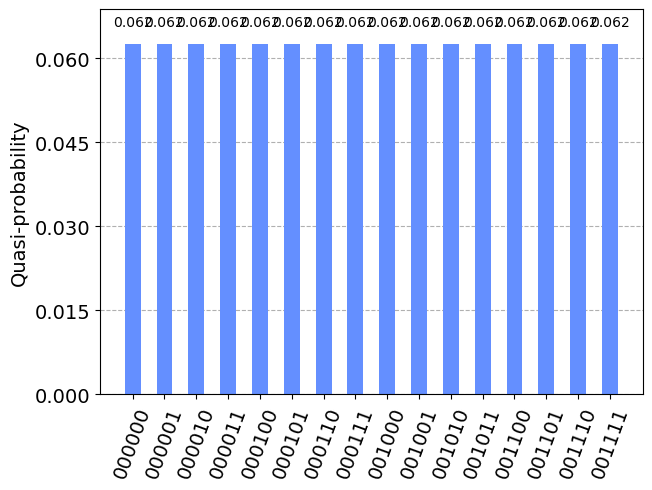

In [50]:
# Executing the circuit.
execute_circuit(qc)

We do have a uniform superposition. Now, lets define and append the diffusion operator to the circuit to enhance the probability of measuring the circuit in desired states. NOTE: From the above histogram, the states are to be read from right to left.

In [51]:
# Defining the Diffusion Operator.
def diffusion_opertor(PassengerRegister):
    
    # Preparing the diffusion operator circuit.
    diffusion_operator_circuit = QuantumCircuit(PassengerRegister)
    
    # Constructing the diffusion operator.
    diffusion_operator_circuit.h(PassengerRegister)
    diffusion_operator_circuit.x(PassengerRegister)
    diffusion_operator_circuit.append(ZGate().control(num_qubits-1), PassengerRegister)
    diffusion_operator_circuit.x(PassengerRegister)
    diffusion_operator_circuit.h(PassengerRegister)
    
    # Naming.
    diffusion_operator_circuit.name= 'DiffusionCircuit'

    return diffusion_operator_circuit

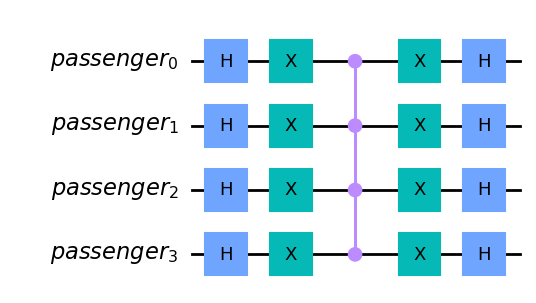

In [52]:
# Visualizing the diffusion circuit

DiffusionOperator = diffusion_opertor(passenger_register)
DiffusionOperator.draw('mpl')

Now, we are only left with appending it to the Quantum Circuit.

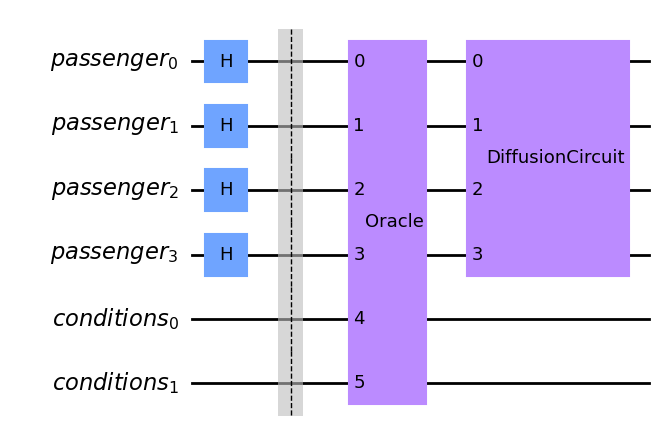

In [53]:
qc.append(DiffusionOperator, [i for i in range(num_qubits)])

# Visualzing the circuit.
qc.draw('mpl')

Now, we shall run the circuit and expect the probabilities of observing the states representing the Rice boys to be maximized.

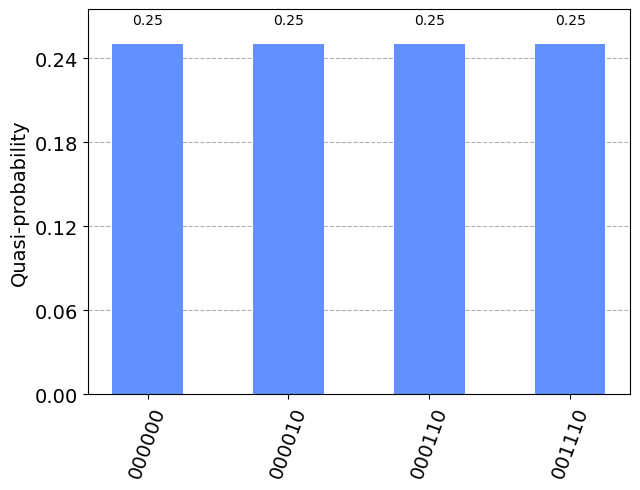

In [54]:
execute_circuit(qc)

The above states correspond to the Rice boys and the it can be seen that only these states are observed with equal probabilities while all the other states are ruled out with their probabilities going to zero. If however, other states were still present (with a low probability), we could apply the Oracle+DiffusionOperator combination $[\frac{\pi\sqrt{N}}{4}]$ times, where [] represents the greatest integer function.

For example, lets consider Mrs. Futrelle. She has only one Spouse. Lets consider another subset with 16 entries.

In [55]:
MrsFutrelle = titanic_data[titanic_data["PassengerId"].eq(4)]
print(MrsFutrelle)

   PassengerId  Survived  Pclass  \
3            4         1       1   

                                           Name     Sex   Age  SibSp  Parch  \
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   

   Ticket  Fare Cabin Embarked  
3  113803  53.1  C123        S  


In [56]:
subset = list(titanic_data[titanic_data["Name"].str.contains('Futrelle') & titanic_data["PassengerId"].ne(4)]["PassengerId"])

ID = []

# Selecting random passengers other than the Rice boys
for i in range(15):
    randomID = random.randrange(0,len(titanic_data))
    if randomID not in subset:
        ID.append(randomID)

# Creating a list of 16 passengers
passengers_list = ID + subset

In [57]:
# Creating a new dataframe
df = titanic_data[titanic_data["PassengerId"].isin(passengers_list)]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S


In [58]:
# Number of qubits to be used.
num_qubits = 4
N = num_qubits**2

# Specifying the Surname.
Surname = MrsFutrelle.Name.to_string(index=False).split(',')[0]

# Specifying the Ticket.
Ticket = MrsFutrelle.Ticket.to_string(index=False)

In [59]:
# Printing the encoded passengers.
for index in range(0, 16):        
    encoded_passenger = df.iloc[[index]]
    print(index, encode_passengers(index), encoded_passenger.Name.to_string(index=False))

0 0000 Futrelle, Mr. Jacques Heath
1 0001 Asplund, Master. Clarence Gustaf Hugo
2 0010 Newell, Miss. Madeleine
3 0011 Harknett, Miss. Alice Phoebe
4 0100 Asplund, Master. Edvin Rojj Felix
5 0101 Henry, Miss. Delia
6 0110 Charters, Mr. David
7 0111 West, Mr. Edwy Arthur
8 1000 Coleff, Mr. Satio
9 1001 Hocking, Mr. Richard George
10 1010 Nicholson, Mr. Arthur Ernest
11 1011 Bourke, Miss. Mary
12 1100 Becker, Miss. Marion Louise
13 1101 Parr, Mr. William Henry Marsh
14 1110 Madill, Miss. Georgette Alexandra
15 1111 Alexander, Mr. William


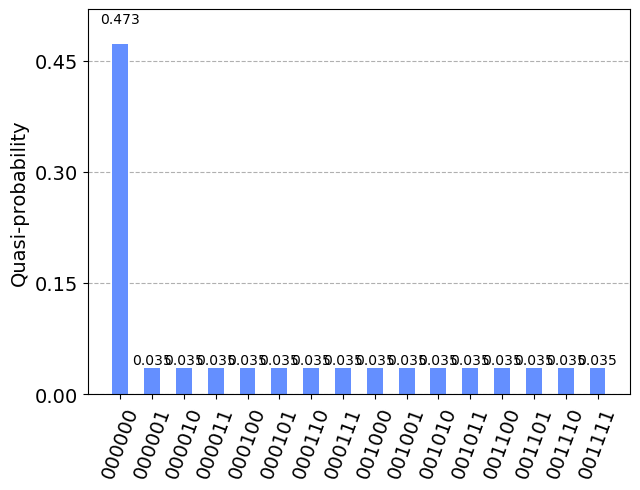

In [60]:
# Making qunatum circuit.
qc = QuantumCircuit(passenger_register, conditions_register)

# Creating uniform superposition.
qc.h(passenger_register)

# Appending the Oracle and Diffusion Operator
qc.append(oracle_circuit(df, passenger_register, conditions_register), [i for i in range(num_qubits+num_conditions)])
qc.append(diffusion_opertor(passenger_register), [i for i in range(num_qubits)])

# Executing the circuit
execute_circuit(qc)

Now it can be seen that the probability of observing the correct relative has been enhanced to 0.473 while the probabilities of measuring them in any other states has been reduced to 0.035. Now, lets apply the Oracle + Diffusion Operator combination desired number of times.

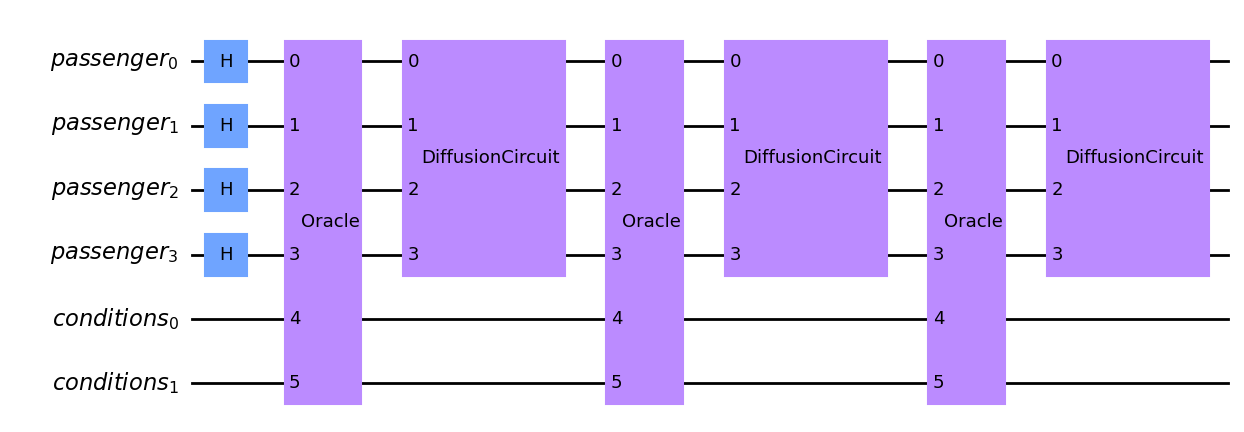

In [61]:
import numpy as np

# Making another qunatum circuit.
qc = QuantumCircuit(passenger_register, conditions_register)

# Creating uniform superposition.
qc.h(passenger_register)

num_iterations = int(np.pi*np.sqrt(N)/4)

for iteration in range(num_iterations):
    qc.append(oracle_circuit(df, passenger_register, conditions_register), [i for i in range(num_qubits+num_conditions)])
    qc.append(diffusion_opertor(passenger_register), [i for i in range(num_qubits)])
    
qc.draw('mpl')

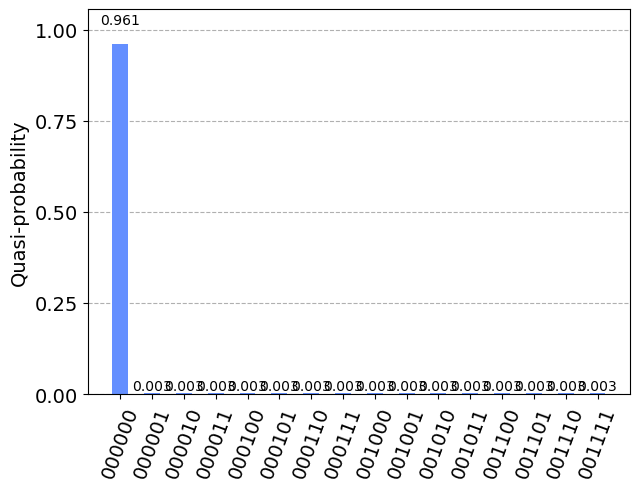

In [62]:
# Executing the circuit again.
execute_circuit(qc)

Now, we see that the probability has been enhanced to 0.961, making it almost certain to observe the correct state corresponding to Mrs. Futrelle's spouse. 

Grover's algorithm promises a quadratic speedup as the number of iterations of the compound operator (Oracle + Diffusion Operator) required scales as $\sqrt{N}$. We encourage the reader to come up with new uses of the Grover's algorithm and question its functionality for an overall betterment of the Quantum Data Science community.